# COMPUTATIONAL SOCIAL NETWORK ANALYSIS
## Moses Boudourides

# I. Graphs and Plots

<span style="color:green">
    
### [1. Constructing a Graph](#1)

### [2. NetworkX Graph Generators](#2)

### [3. Saving a Graph (as a file)](#3)

### [4. Undirected Graphs](#4)

### [5. Directed Graphs](#5)

### [6. Bipartite Graphs](#6)

### [7. Trees](#7)

### [8. Weighted Graphs](#8)

### [9. Multigraphs](#9)

</span>

In [1]:
# The modules (libraries) of Python which are used in this notebook:

import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from collections import Counter
import random
import math
import numpy as np
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
from IPython.core.display import Image, display

<a id='1'></a>
## <span style="color:green">1. Constructing a Graph</span>

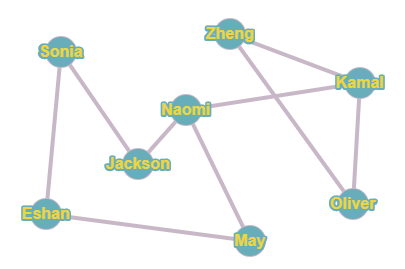

In [2]:
display(Image('graph0.png')) #, width=1900, unconfined=True))

In [3]:
def gne(G,name):
    if G.is_directed()==True:
        print("The %s graph is a directed graph" %name)
    else:
        print("The %s graph is an undirected graph" %name) 
    if nx.is_bipartite(G)==True:
        print("The %s is a bipartite graph" %name)
    if nx.is_weighted(G)==True:
        print("The %s graph is a weighted graph" %name)
    if G.is_multigraph()==True:
        print("The %s graph is a multigraph" %name)
    if nx.is_tree(G)==True:
        print("The %s graph is a tree" %name)
    nodes=sorted(G.nodes())
    if set([type(n) for n in G.nodes()])=={str}:
        sn=", ".join(nodes)
    else:
        sn=", ".join([str(n) for n in G.nodes()])
    if nx.is_weighted(G)==False:
        edges=sorted(G.edges())
        se=", ".join(["("+str(x[0])+", "+ str(x[1])+")" for x in edges])
    else:
        edges=sorted(G.edges(data=True))
        se=", ".join(["("+str(x[0])+", "+ str(x[1])+", weight="+str(x[2]['weight'])+")" for x in edges])
    print("The %s graph has %i nodes and %i edges.\nThe nodes are:\n %s.\nThe edges are:\n %s." %(name,len(nodes),len(edges),sn,se))

In [4]:
# List of edges:

list_of_edges=[("Sonia","Eshan"),("Sonia","Jackson"),
               ("Eshan","May"),
               ("May","Naomi"),
               ("Jackson","Naomi"),
               ("Naomi","Kamal"),
               ("Kamal","Zheng"),("Kamal","Oliver"),
               ("Zheng","Oliver")]
G = nx.Graph() # an empty (undirected) graph
G.add_edges_from(list_of_edges)
name = "Example 1"
gne(G,name)

The Example 1 graph is an undirected graph
The Example 1 graph has 8 nodes and 9 edges.
The nodes are:
 Eshan, Jackson, Kamal, May, Naomi, Oliver, Sonia, Zheng.
The edges are:
 (Eshan, May), (Jackson, Naomi), (Kamal, Oliver), (Kamal, Zheng), (May, Naomi), (Naomi, Kamal), (Sonia, Eshan), (Sonia, Jackson), (Zheng, Oliver).


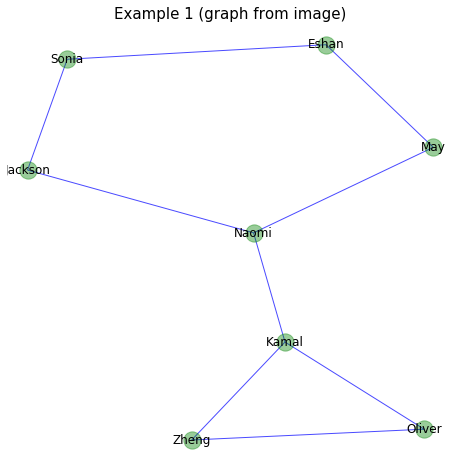

In [5]:
# Graph plot in default pygraphviz layout

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name+" (graph from image)",fontsize=15);

In [6]:
# Positions of nodes in the layout pos=graphviz_layout(G)

for k,v in pos.items():
    print(k,v)

Sonia (50.273, 286.73)
Eshan (128.09, 296.99)
Jackson (38.347, 208.51)
May (160.32, 224.57)
Naomi (106.3, 164.2)
Kamal (115.75, 87.154)
Zheng (87.707, 18.0)
Oliver (157.58, 25.629)


In [7]:
new_pos={}
xa=1.4
ya=0.5
new_pos["Eshan"]=(0,0)
new_pos["May"]=(xa*1.3,-ya*0.1)
new_pos["Sonia"]=(xa*0.1,ya*0.8)
new_pos["Jackson"]=(xa*0.5,ya*0.4)
new_pos["Naomi"]=(xa*0.9,ya*0.6)
new_pos["Zheng"]=(xa*1.3,ya*1.0)
new_pos["Oliver"]=(xa*2,ya*0.1)
new_pos["Kamal"]=(xa*2.1,ya*0.9)

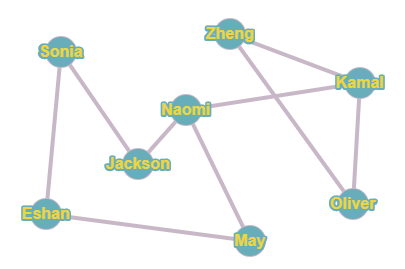

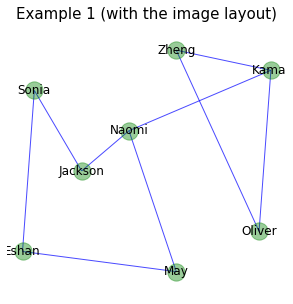

In [8]:
# Graph plot in the layout of the image

pos=new_pos
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title(name+" (with the image layout)",fontsize=15);

display(Image('graph0.png')) #, width=1900, unconfined=True))

### Exercise 1

Construct the graph and plot in in the same layout with the image corresponding to the following 4 images (Example 2, Example 3, Example 4, Example 5): 

Jack_g.png, Lawrence_g.jpg, Olivia_g.jpg, Zekai_g.png

<table><tr><td><img src='Jack_g.png'></td><td><img src='Lawrence_g.jpg'></td></tr><tr><td><img src='Olivia_g.jpg', width=400></td><td><img src='Zekai_g.png', width=400></td></tr></table>

<a id='2'></a>
## <span style="color:green">2. NetworkX Graph Generators</span>

**NetworkX Documentation**: https://networkx.org/documentation/stable//index.html

**NetworkX Graph Generators**: https://networkx.org/documentation/stable//reference/generators.html

<a id='3'></a>
## <span style="color:green">3. Saving a Graph (as a file)</span>

In [9]:
# Saving (gpickeling) the previous graph G

nx.write_gpickle(G, "Graph_"+name.replace(" ","")+"_from_image.gpkl")

In [10]:
# Reading a saved (gpickeled) graph

G1 = nx.read_gpickle("Graph_"+name.replace(" ","")+"_from_image.gpkl")

In [11]:
gne(G1,name)

The Example 1 graph is an undirected graph
The Example 1 graph has 8 nodes and 9 edges.
The nodes are:
 Eshan, Jackson, Kamal, May, Naomi, Oliver, Sonia, Zheng.
The edges are:
 (Eshan, May), (Jackson, Naomi), (Kamal, Oliver), (Kamal, Zheng), (May, Naomi), (Naomi, Kamal), (Sonia, Eshan), (Sonia, Jackson), (Zheng, Oliver).


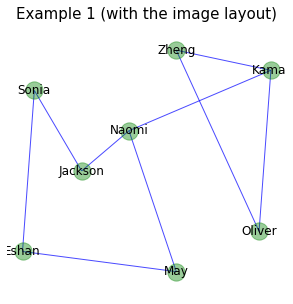

In [12]:
pos=new_pos
plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G1, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G1, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G1, pos)
plt.axis('off');
plt.title(name+" (with the image layout)",fontsize=15);

<a id='4'></a>
## <span style="color:green">4. Undirected Graphs</span>

The Florentine Families graph is an undirected graph
The Florentine Families graph has 15 nodes and 20 edges.
The nodes are:
 Acciaiuoli, Albizzi, Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Pazzi, Peruzzi, Ridolfi, Salviati, Strozzi, Tornabuoni.
The edges are:
 (Acciaiuoli, Medici), (Albizzi, Ginori), (Albizzi, Guadagni), (Bischeri, Guadagni), (Castellani, Barbadori), (Castellani, Peruzzi), (Castellani, Strozzi), (Guadagni, Lamberteschi), (Medici, Albizzi), (Medici, Barbadori), (Medici, Ridolfi), (Medici, Salviati), (Medici, Tornabuoni), (Peruzzi, Bischeri), (Peruzzi, Strozzi), (Ridolfi, Tornabuoni), (Salviati, Pazzi), (Strozzi, Bischeri), (Strozzi, Ridolfi), (Tornabuoni, Guadagni).


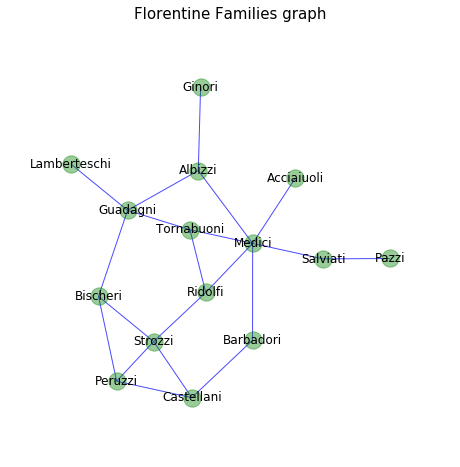

In [13]:
name = "Florentine Families"
Gff = nx.florentine_families_graph()
gne(Gff,name)

pos=graphviz_layout(Gff)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(Gff, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gff, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gff, pos)
plt.axis('off');
plt.title(name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

The Karate Club graph is an undirected graph
The Karate Club graph has 34 nodes and 78 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33.
The edges are:
 (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33).


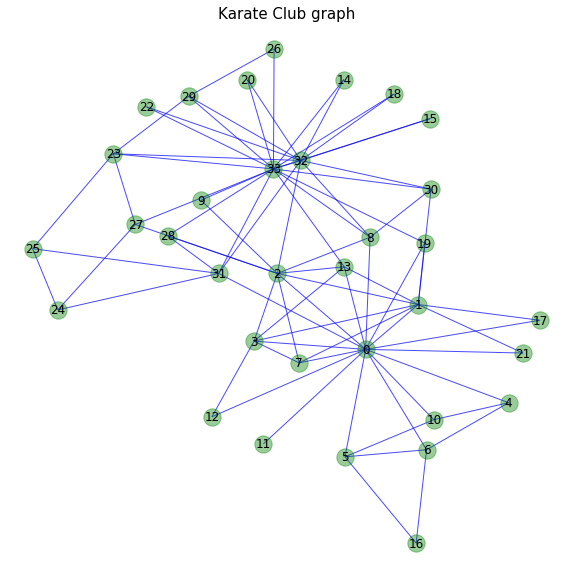

In [14]:
name = "Karate Club"
Gkc = nx.karate_club_graph()
gne(Gkc,name)

pos=graphviz_layout(Gkc)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Gkc, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gkc, pos,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gkc, pos)
plt.axis('off');
plt.title(name+" graph",fontsize=15);
# plt.margins(x=0.2, y=0.2)

### Exercise 2

Repeat the above computations for the following graphs (give names):

* nx.pappus_graph()
* nx.erdos_renyi_graph(n=15, p=0.12, directed=False)
* nx.krackhardt_kite_graph()
* nx.gnm_random_graph(n=15, m=20, directed=False)

<a id='5'></a>
## <span style="color:green">5. Directed Graphs</span>

The directed Erdos-Renyi random graph is a directed graph
The directed Erdos-Renyi random graph has 10 nodes and 12 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
The edges are:
 (0, 2), (0, 3), (1, 2), (1, 8), (2, 5), (2, 9), (3, 4), (4, 0), (4, 3), (5, 4), (5, 9), (9, 3).


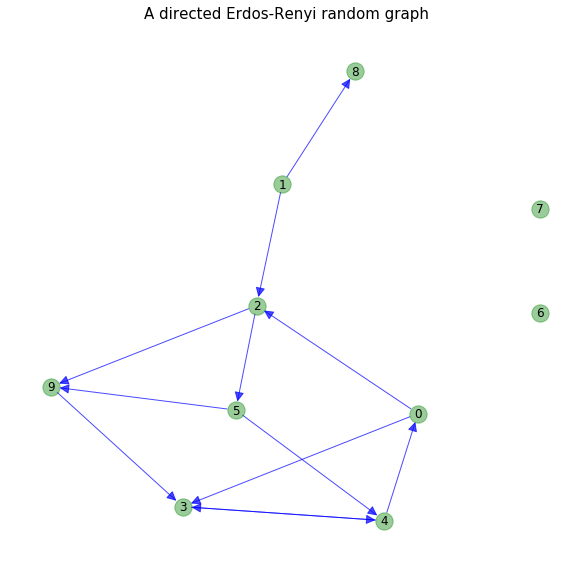

In [15]:
name = "directed Erdos-Renyi random"
Ger = nx.erdos_renyi_graph(n=10, p=0.15, directed=True)
gne(Ger,name)

pos=graphviz_layout(Ger)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Ger, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Ger,pos,arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Ger, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);
# plt.margins(x=0.2, y=0.2)

The directed Gnm random graph is a directed graph
The directed Gnm random graph has 10 nodes and 17 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
The edges are:
 (0, 1), (1, 3), (1, 5), (2, 1), (2, 4), (3, 8), (4, 1), (5, 1), (5, 7), (6, 7), (7, 0), (7, 2), (8, 1), (8, 7), (9, 5), (9, 6), (9, 7).


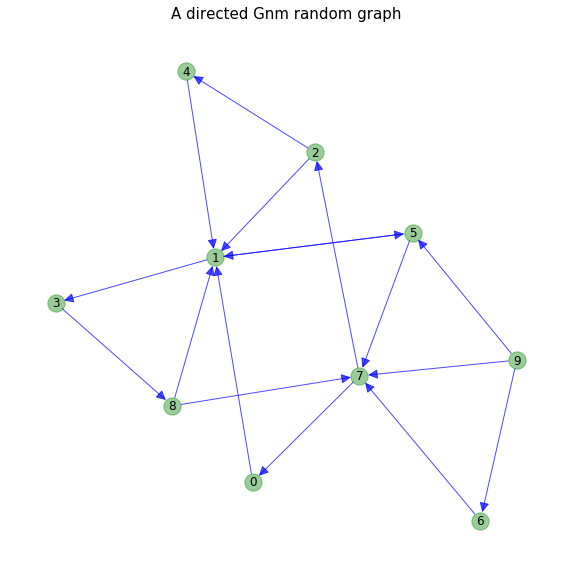

In [16]:
name = "directed Gnm random"
Gnm = nx.gnm_random_graph(n=10, m=17, directed=True)
gne(Gnm,name)

pos=graphviz_layout(Gnm)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Gnm, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gnm,pos,arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gnm, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);
# plt.margins(x=0.2, y=0.2)

### Exercise 3

Repeat the above computations for the following graphs (give names):

* nx.gn_graph(10) # the Gn random graph
* nx.scale_free_graph(50) # the scale-free random graph
* nx.binomial_graph(n=20, p=0.1, directed=True) # the binomial random graph
* nx.gnp_random_graph(n=20, p=0.1, directed=True) # the Gnp random graph

The directed Binomial graph is a directed graph
The directed Binomial graph has 20 nodes and 38 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
The edges are:
 (0, 17), (1, 3), (1, 18), (2, 9), (2, 10), (2, 13), (4, 2), (4, 3), (6, 0), (7, 9), (8, 2), (8, 16), (9, 1), (9, 3), (10, 16), (10, 17), (11, 4), (11, 13), (12, 11), (13, 1), (13, 7), (14, 1), (14, 3), (15, 1), (15, 6), (15, 13), (15, 16), (15, 17), (16, 11), (17, 5), (17, 12), (18, 4), (18, 11), (18, 12), (18, 14), (18, 19), (19, 7), (19, 13).


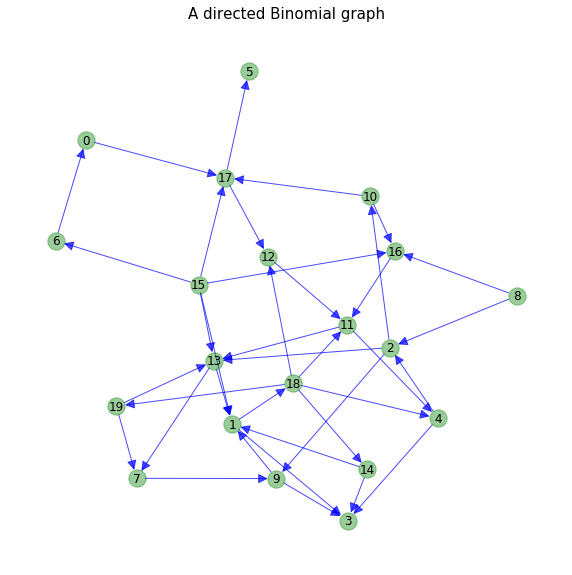

In [17]:
name = "directed Binomial"
Gnm = nx.gnp_random_graph(n=20, p=0.1, directed=True)
gne(Gnm,name)

pos=graphviz_layout(Gnm)
plt.figure(figsize=(10,10));
nodes = nx.draw_networkx_nodes(Gnm, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(Gnm,pos,arrowsize=20,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(Gnm, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);
# plt.margins(x=0.2, y=0.2)

<a id='6'></a>
## <span style="color:green">6. Bipartite Graphs</span>

A **bipartite graph** is an undirected graph in which the set of nodes is partitioned in two sets and the only existing edges are between the nodes of this bipartition (i.e., there are no edges inside each bipartition).

The Southern women graph is an undirected graph
The Southern women is a bipartite graph
The Southern women graph has 32 nodes and 89 edges.
The nodes are:
 Brenda Rogers, Charlotte McDowd, Dorothy Murchison, E1, E10, E11, E12, E13, E14, E2, E3, E4, E5, E6, E7, E8, E9, Eleanor Nye, Evelyn Jefferson, Flora Price, Frances Anderson, Helen Lloyd, Katherina Rogers, Laura Mandeville, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson.
The edges are:
 (Brenda Rogers, E1), (Brenda Rogers, E3), (Brenda Rogers, E4), (Brenda Rogers, E5), (Brenda Rogers, E6), (Brenda Rogers, E7), (Brenda Rogers, E8), (Charlotte McDowd, E3), (Charlotte McDowd, E4), (Charlotte McDowd, E5), (Charlotte McDowd, E7), (Dorothy Murchison, E8), (Dorothy Murchison, E9), (Eleanor Nye, E5), (Eleanor Nye, E6), (Eleanor Nye, E7), (Eleanor Nye, E8), (Evelyn Jefferson, E1), (Evelyn Jefferson, E2), (Evelyn Jefferson, E3), (Evelyn Jefferson, E4), (Evelyn Jeff

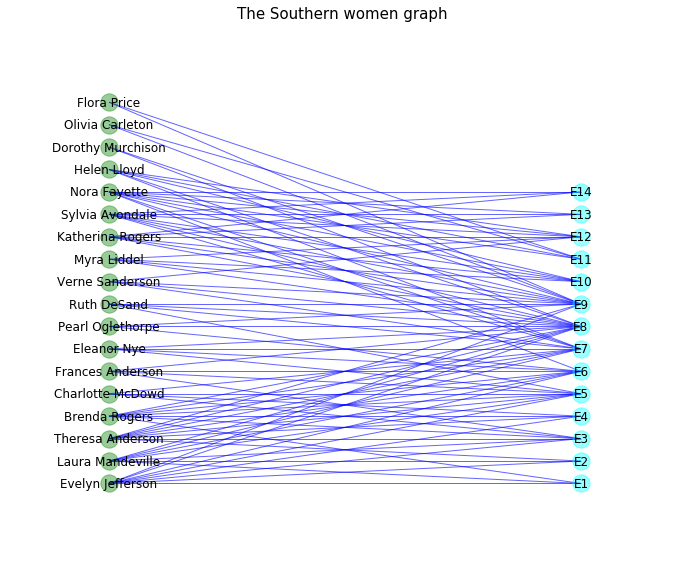

In [18]:
name = "Southern women"

Gsw = nx.davis_southern_women_graph()

X=[n for n in Gsw.nodes() if len(n)>3]
Y=[n for n in Gsw.nodes() if len(n)<4]

gne(Gsw,name)

pos={}
for i,x in list(enumerate(X)):
    pos[x]=(0,i)
for j,y in list(enumerate(Y)):
    pos[y]=(1,j)
plt.figure(figsize=(12,10));
nodes1 = nx.draw_networkx_nodes(Gsw, pos, nodelist=list(X), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(Gsw, pos, nodelist=list(Y), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(Gsw, pos,arrowsize=20, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(Gsw, pos)
plt.axis('off');
plt.title("The "+name+" graph",fontsize=15);
plt.margins(x=0.2, y=0.2)

The X-Y random bipartite graph is an undirected graph
The X-Y random bipartite is a bipartite graph
The X-Y random bipartite graph has 16 nodes and 24 edges.
The nodes are:
 x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5.
The edges are:
 (x0, y0), (x1, y0), (x1, y3), (x1, y4), (x2, y3), (x2, y4), (x3, y1), (x3, y3), (x3, y5), (x4, y0), (x4, y1), (x4, y2), (x4, y4), (x5, y4), (x5, y5), (x6, y3), (x6, y4), (x6, y5), (x7, y0), (x7, y1), (x7, y5), (x8, y0), (x8, y2), (x9, y0).


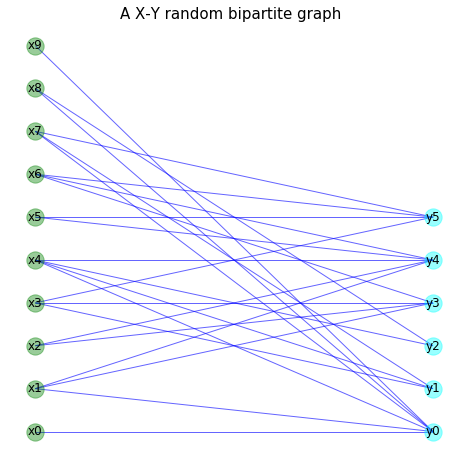

In [19]:
# Construction of a random bipartite set with a bipartition X, Y
# where len(X)=10 and len(Y)=6.

name = "X-Y random bipartite"
B = nx.Graph()
X = ["x"+str(i) for i in range(10)]
Y = ["y"+str(i) for i in range(6)]

XY = [(x,y) for x in X for y in Y]
p = random.uniform(0.4,0.5)   # probability of edge occurrence
E = random.sample(XY,int(p*len(XY)))

B.add_nodes_from(X, bipartite=0)
B.add_nodes_from(Y, bipartite=1)
B.add_edges_from(E)

gne(B,name)

pos={}
for i,x in list(enumerate(X)):
    pos[x]=(0,i)
for j,y in list(enumerate(Y)):
    pos[y]=(1,j)
plt.figure(figsize=(8,8));
nodes1 = nx.draw_networkx_nodes(B, pos, nodelist=list(X), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(B, pos, nodelist=list(Y), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(B, pos,arrowsize=20, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(B, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

The X-Y random bipartite graph is an undirected graph
The X-Y random bipartite is a bipartite graph
The X-Y random bipartite graph has 16 nodes and 60 edges.
The nodes are:
 x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, y0, y1, y2, y3, y4, y5.
The edges are:
 (x0, y0), (x0, y1), (x0, y2), (x0, y3), (x0, y4), (x0, y5), (x1, y0), (x1, y1), (x1, y2), (x1, y3), (x1, y4), (x1, y5), (x2, y0), (x2, y1), (x2, y2), (x2, y3), (x2, y4), (x2, y5), (x3, y0), (x3, y1), (x3, y2), (x3, y3), (x3, y4), (x3, y5), (x4, y0), (x4, y1), (x4, y2), (x4, y3), (x4, y4), (x4, y5), (x5, y0), (x5, y1), (x5, y2), (x5, y3), (x5, y4), (x5, y5), (x6, y0), (x6, y1), (x6, y2), (x6, y3), (x6, y4), (x6, y5), (x7, y0), (x7, y1), (x7, y2), (x7, y3), (x7, y4), (x7, y5), (x8, y0), (x8, y1), (x8, y2), (x8, y3), (x8, y4), (x8, y5), (x9, y0), (x9, y1), (x9, y2), (x9, y3), (x9, y4), (x9, y5).


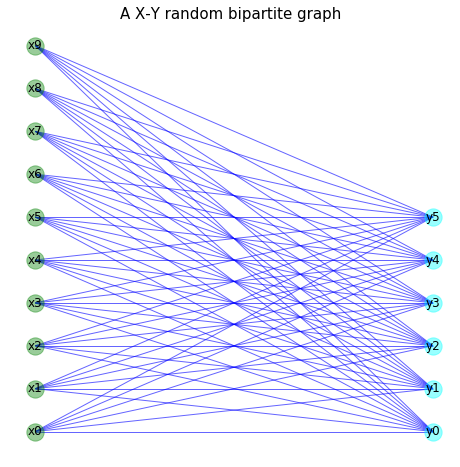

In [9]:
# Construction of a random bipartite set with a bipartition X, Y
# where len(X)=10 and len(Y)=6.

name = "X-Y random bipartite"
B = nx.Graph()
X = ["x"+str(i) for i in range(10)]
Y = ["y"+str(i) for i in range(6)]

XY = [(x,y) for x in X for y in Y]
p = 1 #random.uniform(0.4,0.5)   # probability of edge occurrence
E = random.sample(XY,int(p*len(XY)))

B.add_nodes_from(X, bipartite=0)
B.add_nodes_from(Y, bipartite=1)
B.add_edges_from(E)

gne(B,name)

pos={}
for i,x in list(enumerate(X)):
    pos[x]=(0,i)
for j,y in list(enumerate(Y)):
    pos[y]=(1,j)
plt.figure(figsize=(8,8));
nodes1 = nx.draw_networkx_nodes(B, pos, nodelist=list(X), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(B, pos, nodelist=list(Y), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(B, pos,arrowsize=20, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(B, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

The Erdos-Renyi random bipartite graph is an undirected graph
The Erdos-Renyi random bipartite is a bipartite graph
The Erdos-Renyi random bipartite graph has 15 nodes and 38 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14.
The edges are:
 (0, 6), (0, 11), (0, 13), (1, 8), (1, 9), (1, 11), (1, 12), (2, 6), (2, 8), (3, 4), (3, 6), (3, 8), (3, 9), (3, 11), (3, 12), (4, 5), (4, 7), (4, 10), (4, 14), (5, 6), (5, 8), (5, 9), (5, 11), (5, 12), (5, 13), (6, 7), (6, 14), (7, 8), (7, 9), (7, 11), (7, 12), (8, 10), (8, 14), (9, 10), (9, 14), (10, 12), (11, 14), (13, 14).


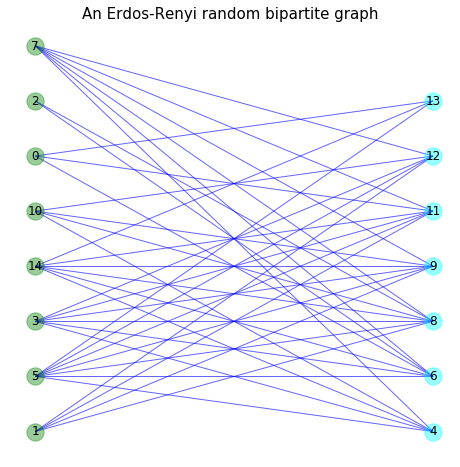

In [10]:
# Construction of a random bipartite graph by bipartitioning the nodes of 
# a random Erdos-Renyi graph into the bipartition X, Y with len(X) = 8, len(Y) = 7, 
# and removing edges inside the sets of the bipartition.

name = "Erdos-Renyi random bipartite"
Ger=nx.erdos_renyi_graph(n=15, p=0.5, directed=False)

X=random.sample(Ger.nodes(),8)
Y=[n for n in Ger.nodes() if n not in X]

I=[e for e in Ger.edges() if (e[0] in X and e[1] in X) or (e[0] in Y and e[1] in Y)]
Ger.remove_edges_from(I)

gne(Ger,name)

pos={}
for i,x in list(enumerate(X)):
    pos[x]=(0,i)
for j,y in list(enumerate(Y)):
    pos[y]=(1,j)
plt.figure(figsize=(8,8));
nodes1 = nx.draw_networkx_nodes(Ger, pos, nodelist=list(X), node_color="g", alpha=0.4)
nodes2 = nx.draw_networkx_nodes(Ger, pos, nodelist=list(Y), node_color="cyan", alpha=0.4)
nx.draw_networkx_edges(Ger, pos,arrowsize=20, edge_color="b", alpha=0.6)
nx.draw_networkx_labels(Ger, pos)
plt.axis('off');
plt.title("An "+name+" graph",fontsize=15);

### Exercise 4

1. Construct a random bipartite set with a bipartition X, Y where len(X)=len(Y)=7.
2. Construct a random bipartite graph by bipartitioning the nodes of a binomial graph nx.binomial_graph(n=25, p=0.3, directed=False) into the bipartition X, Y with len(X) = 15, len(Y) = 10, and removing edges inside the sets of the bipartition.

<a id='7'></a>
## <span style="color:green">7. Trees</span>

The binomial tree graph is an undirected graph
The binomial tree is a bipartite graph
The binomial tree graph is a tree
The binomial tree graph has 8 nodes and 7 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7.
The edges are:
 (0, 1), (0, 2), (0, 4), (2, 3), (4, 5), (4, 6), (6, 7).


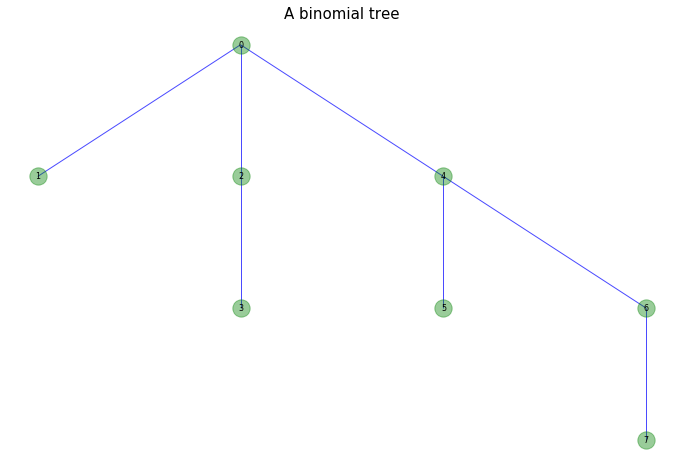

In [21]:
name="binomial tree"
n=random.randint(3,6) #number of nodes
T=nx.binomial_tree(n)

gne(T,name)

pos=graphviz_layout(T)
plt.figure(figsize=(12,8));
pos=graphviz_layout(T, prog='dot') #, args="-Grankdir=LR")
nodes = nx.draw_networkx_nodes(T, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(T, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(T, pos,font_size=8)
plt.axis('off');
plt.title("A "+name,fontsize=15);

The preferential attachment tree graph is an undirected graph
The preferential attachment tree is a bipartite graph
The preferential attachment tree graph is a tree
The preferential attachment tree graph has 20 nodes and 19 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
The edges are:
 (0, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 13), (1, 14), (1, 18), (2, 17), (2, 19), (6, 12), (6, 16), (11, 15).


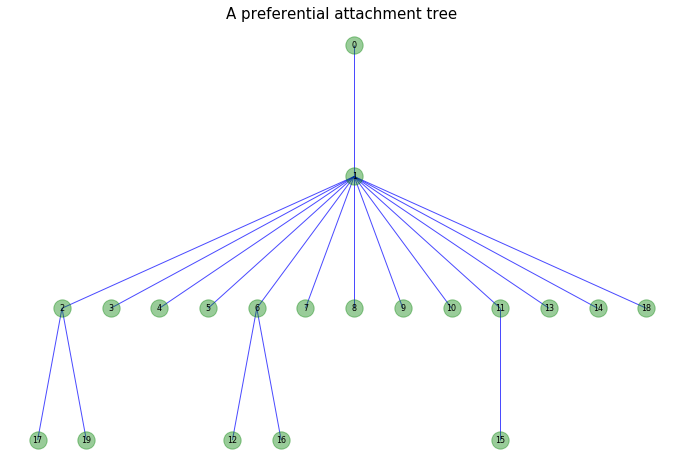

In [22]:
name="preferential attachment tree"
T=nx.barabasi_albert_graph(n=20, m=1)

gne(T,name)

pos=graphviz_layout(T)
plt.figure(figsize=(12,8));
pos=graphviz_layout(T, prog='dot') #, args="-Grankdir=LR")
nodes = nx.draw_networkx_nodes(T, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(T, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(T, pos,font_size=8)
plt.axis('off');
plt.title("A "+name,fontsize=15);

In [11]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

The minimum spanning tree of an Erdos-Renyi graph is an undirected graph
The minimum spanning tree of an Erdos-Renyi is a bipartite graph
The minimum spanning tree of an Erdos-Renyi graph is a tree
The minimum spanning tree of an Erdos-Renyi graph has 20 nodes and 19 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
The edges are:
 (0, 1), (0, 2), (0, 4), (0, 5), (0, 6), (0, 8), (0, 9), (0, 12), (0, 17), (0, 19), (1, 3), (1, 13), (1, 16), (1, 18), (2, 10), (2, 11), (2, 15), (3, 7), (3, 14).


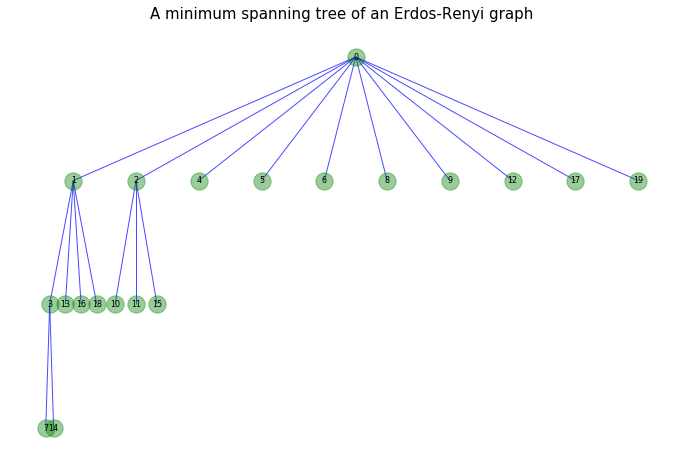

In [18]:
name="minimum spanning tree of an Erdos-Renyi"
Ger=nx.erdos_renyi_graph(n=20, p=0.5, directed=False)
T = nx.minimum_spanning_tree(Ger)

gne(T,name)

plt.figure(figsize=(12,8));

pos = hierarchy_pos(T,0)    
nodes = nx.draw_networkx_nodes(T, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(T, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(T, pos,font_size=8)

plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

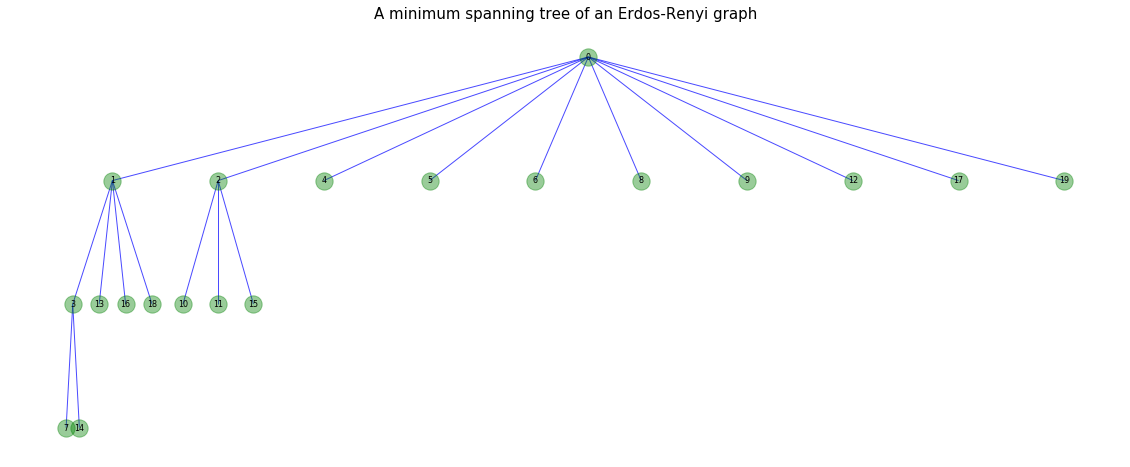

In [20]:
plt.figure(figsize=(20,8));

pos = hierarchy_pos(T,0)    
nodes = nx.draw_networkx_nodes(T, pos, node_color="g", alpha=0.4)#,)
nx.draw_networkx_edges(T, pos, edge_color='b', alpha=0.7)
nx.draw_networkx_labels(T, pos,font_size=8)

plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

### Exercise 5

1. Construct a preferential attachment tree with n=30.
2. Construct a minimum spanning tree of a binomial graph nx.binomial_graph(n=30, p=0.3, directed=False).

<a id='8'></a>
## <span style="color:green">8. Weighted Graphs</span>

**Weighted graph** is a (directed or undirected) graph with edges (joining pairs of nodes) labeled by a scalar weight.

*NetworkX can NOT plot weighted directed graphs with reciprocating edges among pairs of nodes!*

In [21]:
# Function alocating randomly integer weights on edges of a graph.

def weight_attr(G,maxw):
    # G is a graph
    # maxw is a positive integer (maximum weight value)
    weight={}
    for edge in G.edges():
        ed=edge[0]
        de=edge[1]
        G[ed][de]['weight']=random.randrange(1,maxw)
        weight[(ed,de)]=G[ed][de]['weight']
    return weight

The weighted Erdos-Renyi random undirected graph is an undirected graph
The weighted Erdos-Renyi random undirected graph is a weighted graph
The weighted Erdos-Renyi random undirected graph has 16 nodes and 37 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15.
The edges are:
 (0, 1, weight=5), (0, 6, weight=1), (0, 8, weight=3), (0, 12, weight=12), (0, 14, weight=1), (0, 15, weight=7), (1, 3, weight=4), (1, 4, weight=7), (1, 6, weight=1), (1, 8, weight=2), (1, 14, weight=6), (2, 9, weight=3), (2, 12, weight=1), (2, 13, weight=2), (3, 5, weight=11), (3, 7, weight=4), (3, 10, weight=10), (3, 11, weight=6), (4, 8, weight=1), (4, 11, weight=1), (4, 13, weight=11), (4, 14, weight=4), (5, 7, weight=8), (5, 9, weight=7), (6, 9, weight=10), (6, 10, weight=11), (7, 12, weight=12), (7, 14, weight=4), (8, 10, weight=4), (9, 15, weight=12), (10, 11, weight=12), (10, 14, weight=4), (11, 14, weight=7), (12, 13, weight=7), (12, 14, weight=1), (12, 15, weight=3), (13, 14, wei

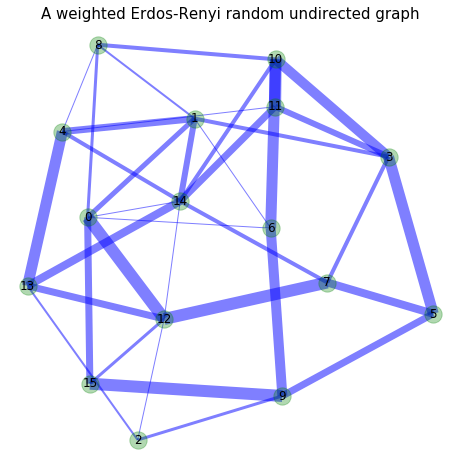

In [25]:
nodes=random.randint(15,26)
p=random.uniform(0.2,0.3)
name="weighted Erdos-Renyi random undirected"

G=nx.erdos_renyi_graph(nodes,p)
maxw=random.randint(5,16)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)

gne(G,name)

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]
print("min weight =",min(edge_width),"max weight =",max(edge_width))

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

min weight = 1 max weight = 12
The weighted Gnm random directed graph is a directed graph
The weighted Gnm random directed graph is a weighted graph
The weighted Gnm random directed graph has 17 nodes and 38 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16.
The edges are:
 (0, 2, weight=5), (0, 4, weight=3), (1, 16, weight=2), (2, 3, weight=1), (2, 14, weight=2), (3, 1, weight=4), (3, 12, weight=1), (3, 13, weight=5), (4, 2, weight=4), (4, 6, weight=2), (4, 8, weight=2), (4, 9, weight=1), (5, 4, weight=2), (5, 8, weight=6), (5, 16, weight=5), (6, 11, weight=4), (6, 14, weight=5), (7, 1, weight=5), (7, 13, weight=3), (7, 15, weight=4), (8, 2, weight=6), (8, 15, weight=3), (9, 3, weight=3), (10, 6, weight=2), (11, 9, weight=3), (12, 4, weight=3), (12, 9, weight=6), (13, 9, weight=1), (13, 12, weight=5), (14, 3, weight=2), (14, 8, weight=5), (14, 15, weight=3), (14, 16, weight=4), (15, 5, weight=4), (15, 10, weight=2), (15, 12, weight=4), (16, 2, weight=5), 

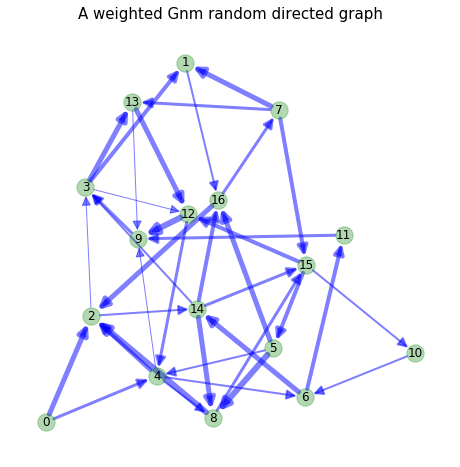

In [27]:
nodes=random.randint(15,26)
edges=40
name="weighted Gnm random directed"
G=nx.gnm_random_graph(nodes,edges,directed=True)

for e in G.edges():
    if (e[1],e[0]) in G.edges:
        G.remove_edge(*(e[1],e[0]))

maxw=random.randint(5,16)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)
print("min weight =",min(edge_width),"max weight =",max(edge_width))

gne(G,name)

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name+" graph",fontsize=15);

### Exercise 6

As above construct and plot:

1. a weighted binomial undirected graph
2. a weighted scale-free directed graph

<a id='9'></a>
## <span style="color:green">9. Multigraphs</span>

**Multigraph** is a (directed or undirected) graph with multiple edges (joining pairs of nodes).

*NetworkX can NOT plot directed multigraphs with reciprocating edges among pairs of nodes!*

In [37]:
def add_multiedges(G,k):
    # E is a list of edges
    # k is a positive integer for the edges to be added in parallel to existing ones 
    edges = list(G.edges())
    for _ in range(k):
        e=random.choice(list(E))
        for b in range(5):
            edges.append(e)
    Gm = nx.MultiGraph()
    Gm.add_edges_from(edges)
    return Gm

15
Counter({(0, 18): 6, (4, 24): 6, (6, 10): 6, (8, 1): 6, (8, 16): 6, (8, 22): 6, (18, 2): 6, (18, 7): 6, (18, 14): 6, (21, 22): 6, (1, 9): 6, (1, 17): 6, (5, 19): 6, (10, 16): 6, (16, 15): 6, (0, 3): 1, (0, 4): 1, (0, 6): 1, (0, 8): 1, (0, 21): 1, (3, 1): 1, (3, 5): 1, (3, 7): 1, (3, 10): 1, (3, 16): 1, (3, 19): 1, (3, 21): 1, (3, 23): 1, (4, 8): 1, (4, 9): 1, (4, 11): 1, (4, 14): 1, (4, 16): 1, (4, 21): 1, (4, 22): 1, (4, 23): 1, (6, 9): 1, (6, 11): 1, (6, 23): 1, (8, 2): 1, (8, 12): 1, (8, 15): 1, (8, 19): 1, (8, 20): 1, (8, 23): 1, (18, 11): 1, (18, 17): 1, (18, 23): 1, (21, 2): 1, (21, 16): 1, (21, 23): 1, (21, 24): 1, (1, 11): 1, (9, 13): 1, (9, 16): 1, (9, 24): 1, (11, 2): 1, (11, 10): 1, (11, 19): 1, (11, 24): 1, (17, 10): 1, (2, 5): 1, (2, 20): 1, (20, 15): 1, (20, 24): 1, (7, 10): 1, (7, 14): 1, (7, 19): 1, (7, 23): 1, (7, 24): 1, (16, 13): 1, (16, 22): 1, (16, 23): 1, (16, 24): 1, (19, 22): 1, (19, 24): 1, (22, 13): 1})
1 6
The Erdos-Renyi random undirected multigraph graph

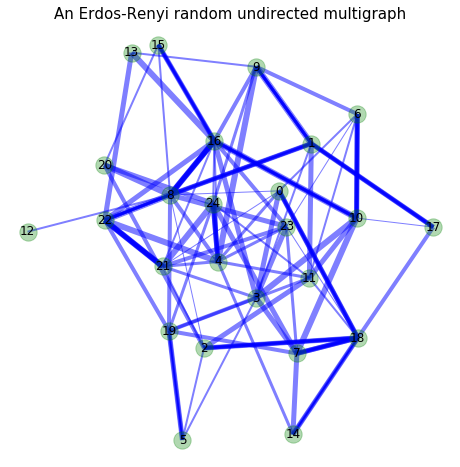

In [38]:
nodes=random.randint(15,26)
p=random.uniform(0.2,0.3)
name="Erdos-Renyi random undirected multigraph"
G=nx.erdos_renyi_graph(nodes,p)
        
E=G.edges()
k=random.randint(5,16)
print(k)

G=add_multiedges(G,k)
print(Counter(G.edges()))
print(min(Counter(G.edges()).values()),max(Counter(G.edges()).values()))
        
gne(G,name)

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("An "+name,fontsize=15);

The Gnm random directed multigraph graph is a directed graph
The Gnm random directed multigraph graph is a weighted graph
The Gnm random directed multigraph graph has 20 nodes and 39 edges.
The nodes are:
 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19.
The edges are:
 (0, 3, weight=5), (0, 18, weight=4), (1, 0, weight=2), (1, 8, weight=2), (1, 11, weight=5), (1, 17, weight=1), (2, 1, weight=5), (2, 13, weight=2), (4, 1, weight=3), (5, 2, weight=1), (6, 17, weight=5), (7, 15, weight=2), (8, 9, weight=4), (8, 16, weight=5), (9, 13, weight=4), (9, 16, weight=1), (10, 9, weight=3), (10, 14, weight=3), (11, 3, weight=5), (11, 5, weight=5), (11, 9, weight=1), (11, 10, weight=1), (11, 19, weight=3), (12, 5, weight=2), (12, 6, weight=1), (12, 8, weight=2), (12, 13, weight=1), (12, 14, weight=4), (13, 6, weight=5), (13, 8, weight=3), (14, 1, weight=4), (14, 6, weight=4), (15, 16, weight=3), (15, 18, weight=2), (17, 2, weight=4), (17, 10, weight=5), (17, 18, weight=2), (18

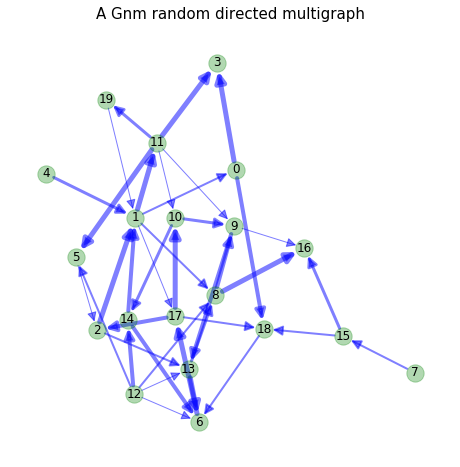

In [39]:
nodes=random.randint(15,26)
edges=40
name="Gnm random directed multigraph"
G=nx.gnm_random_graph(nodes,edges,directed=True)
for e in G.edges():
    if (e[1],e[0]) in G.edges:
        G.remove_edge(*(e[1],e[0]))
maxw=random.randint(5,16)
weight=weight_attr(G,maxw)
w_edges=[(x,y,z) for (x,y),z in weight.items()]
G.add_weighted_edges_from(w_edges)

gne(G,name)

edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w for w in edge_width]

pos=graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("A "+name,fontsize=15);

#### Converting multigraph to weighted graph

The corresponding weighted Gnm random directed graph is a directed graph
The corresponding weighted Gnm random directed graph is a weighted graph
The corresponding weighted Gnm random directed graph has 20 nodes and 39 edges.
The nodes are:
 0, 3, 18, 1, 17, 11, 8, 2, 13, 4, 5, 6, 7, 15, 16, 9, 10, 14, 19, 12.
The edges are:
 (0, 3, weight={'weight': 5}), (0, 18, weight={'weight': 4}), (1, 0, weight={'weight': 2}), (1, 8, weight={'weight': 2}), (1, 11, weight={'weight': 5}), (1, 17, weight={'weight': 1}), (2, 1, weight={'weight': 5}), (2, 13, weight={'weight': 2}), (4, 1, weight={'weight': 3}), (5, 2, weight={'weight': 1}), (6, 17, weight={'weight': 5}), (7, 15, weight={'weight': 2}), (8, 9, weight={'weight': 4}), (8, 16, weight={'weight': 5}), (9, 13, weight={'weight': 4}), (9, 16, weight={'weight': 1}), (10, 9, weight={'weight': 3}), (10, 14, weight={'weight': 3}), (11, 3, weight={'weight': 5}), (11, 5, weight={'weight': 5}), (11, 9, weight={'weight': 1}), (11, 10, weight={'weight': 

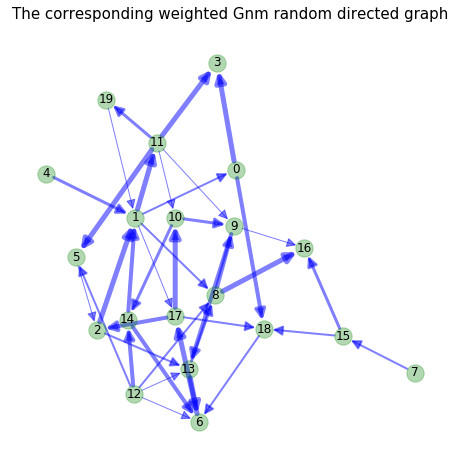

In [40]:
name="corresponding weighted Gnm random directed"
weight=[(x, y, {'weight': v}) for (x, y), v in Counter(G.edges()).items()]
G = nx.DiGraph(weight)
edge_width=[G[u][v]['weight'] for u,v in G.edges()] 
edge_width=[w['weight'] for w in edge_width]

gne(G,name)

pos=pos #graphviz_layout(G)
plt.figure(figsize=(8,8));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.3)
nx.draw_networkx_edges(G, pos,arrowsize=20, width=edge_width, edge_color="b", alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.title("The "+name+" graph",fontsize=15);

### Exercise 7

First, as above. construct and plot:

1. a binomial undirected multigraph
2. a scale-free directed multigraph

Next, convert these graphs to weighted undirected/directed multigraphs.